# Исследование объявлений о продаже квартир

Даны данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных

<ul>
<li>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</li>
<li>balcony — число балконов</li>
<li>ceiling_height — высота потолков (м)</li>
<li>cityCenters_nearest — расстояние до центра города (м)</li>
<li>days_exposition — сколько дней было размещено объявление (от публикации до снятия)</li>
<li>first_day_exposition — дата публикации</li>
<li>floor — этаж</li>
<li>floors_total — всего этажей в доме</li>
<li>is_apartment — апартаменты (булев тип)</li>
<li>kitchen_area — площадь кухни в квадратных метрах (м²)</li>
<li>last_price — цена на момент снятия с публикации</li>
<li>living_area — жилая площадь в квадратных метрах (м²)</li>
<li>locality_name — название населённого пункта</li>
<li>open_plan — свободная планировка (булев тип)</li>
<li>parks_around3000 — число парков в радиусе 3 км</li>
<li>parks_nearest — расстояние до ближайшего парка (м)</li>
<li>ponds_around3000 — число водоёмов в радиусе 3 км</li>
<li>ponds_nearest — расстояние до ближайшего водоёма (м)</li>
<li>rooms — число комнат</li>
<li>studio — квартира-студия (булев тип)</li>
<li>total_area — площадь квартиры в квадратных метрах (м²)</li>
<li>total_images — число фотографий квартиры в объявлении</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Изучение данных из файла

In [2]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<b>Вывод:</b> таблица разделена не запятой, а '\t', что требует использования параметра sep = '\t'. В ходе изучения данных можно заметить, что в таблице разное число non-null объектов в каждой строке, из чего можно сделать вывод, что есть пропущенные значения, которые надо чем-то заменить. В столбце first_day_exposition следует перевести данные из строки в дату и время. Также в некоторых столбцах стоит поменять тип данных, например в столбце parks_around3000, число парков в радиусе 3 км явно будет целым числом, не может быть половина парка.

## Предобработка данных

### Обработка пропусков

Достаточно много столбцов, в которых есть пропущенные значения. Начнем по порядку:
1. ceiling_height - высота потолков в метрах - тут никак не получится усреднить данные. Поэтому, возможно, стоит оставить данные как есть.
2. floors_total  - всего этажей в доме - в данном случае также невозможно узнать на какое значение следует заменить пропущенные данные.
3. living_area - жилая площадь в квадратных метрах(м²) - нельзя точно определить какова площадь, не узная ее от продавца. Но можно попробовать взять среднее по квартирам с аналогичным количеством комнат и взять среднюю долю жилой площади в них.
4. is_apartment - апартаменты (булев тип) - в данном столбце достаточно много пропущенных значений. Следует проверить какие именно там значения, то есть доля True и False. Возможно причина пропусков в том, что заполнены только значения True, если это так, тот NaN можно заменить на значение False. 
5. kitchen_area - площадь кухни в квадратных метрах (м²) - нельзя точно определить какова площадь, не узная ее от продавца, но можно аналогично living_area взять среднее по квартирам с таким же количеством комнат и взять среднюю площадь кухни в них.
6. balcony - число балконов - Если не указано число балконов, то скорее всего их нет. Тут целесообразно заменить пропущенные значения на 0;
7. locality_name - название населённого пункта - указывается продавцом, в данном случае пропусков совсем немного, но также нельзя точно сказать каков населенный пункт, не узная этого от продавца.
8. airports_nearest - расстояние до ближайшего аэропорта в метрах (м) - рассчитывается автоматически, поэтому тут могут быть технические неполадки. Тут нет подходящего значения на замену, так как мы не можем точно знать, где именно расположена недвижимость.
9. cityCenters_nearest - расстояние до центра города (м) - рассчитывается автоматически, ошибка может быть аналогична со столбцом airports_nearest
10. parks_around3000 - число парков в радиусе 3 км - значения в данном столбце могут быть пропущены по той причине, что в данном радиусе нет парков и продавец решил не заполнять это поле. В данном случае значения можно заменить на 0.
11. parks_nearest - расстояние до ближайшего парка (м) - расстояние до центра города (м) - рассчитывается автоматически, ошибка может быть аналогична со столбцом airports_nearest
12. ponds_around3000 - число водоёмов в радиусе 3 км - значения в данном столбце могут быть пропущены по той причине, что в данном радиусе нет водоемов и продавец решил не заполнять это поле. В данном случае значения можно заменить на 0.
13. ponds_nearest - расстояние до ближайшего водоёма (м) - расстояние до центра города (м) - рассчитывается автоматически, ошибка может быть аналогична со столбцом airports_nearest
14. days_exposition - сколько дней было размещено объявление (от публикации до снятия) - данная величина может быть не указана по той причине, что объявление почему-то до сих пор остается на сайте, продавец забыл его снять. В таком случае мы знаем только дату публикации, но не знаем дату снятия объявления, следовательно не можем сказать, сколько дней было размещено объявление. 

<b>Замена пропусков в столбце balcony</b>

balcony - число балконов - Если не указано число балконов, то скорее всего их нет. Тут целесообразно заменить пропущенные значения на 0

In [4]:
data['balcony'] = data['balcony'].fillna(0)

<b>Заполна пропусков в столбце living_area</b>

living_area - жилая площадь в квадратных метрах(м²) - нельзя точно определить какова площадь, не узная ее от продавца. Но можно попробовать взять квартиры с аналогичным количеством комнат и взять медианную долю жилой площади в них

In [5]:
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

<b>Замена пропусков в столбце is_apartment</b>

is_apartment - апартаменты (булев тип) - в данном столбце достаточно много пропущенных значений. Следует проверить какие именно там значения, то есть доля True и False. Возможно причина пропусков в том, что заполнены только значения True, если это так, тот NaN можно заменить на значение False

In [6]:
#Только 50 значений из 2775 имеют значение True.
data['is_apartment'] = data['is_apartment'].fillna(False)

<b>Замена пропусков в стобце kitchen_area</b>

kitchen_area - площадь кухни в квадратных метрах (м²) - нельзя точно определить какова площадь, не узная ее от продавца, но можно аналогично living_area взять квартирs с таким же количеством комнат и взять медианную площадь кухни в них. Но даже после этого останутся пропуски в данных. Скорее всего такие квартиры являются студиями и в них отдельно не считае тся площадь кухни. Заменим данные пропуски на 0

In [7]:
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['kitchen_area'] = data['kitchen_area'].fillna(0)

<b>Замена пропусков в столбцах parks_around3000 и ponds_around3000</b>

Значения в данных столбце могут быть пропущены по той причине, что в данном радиусе нет парков и прудов и продавец решил не заполнять это поле. В данном случае значения можно заменить на 0

In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<b>Пропуски в столбце locality_name</b>

Удалим пропуски из столбца locality_name, так как не можем быть уверены, что они пренадлежат Лен.области

In [9]:
data = data.dropna(subset = ['locality_name']).reset_index(drop = True)

<b>Замена пропусков в столбце ceiling_height</b>

Заменим высоту потолков на медианное значение

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<b>Замена пропусков в столбце floors_total</b>

In [11]:
data['floors_total'] = data['floors_total'].fillna('не определено')

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  object 
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Приведение данных к нужному типу

<b>Замена типов данных в столбцах parks_around3000 и ponds_around3000</b>

Эти столбцы имеют тип float, хотя очевидно, что не может быть пол пруда или парка. Заменим их тип на int

In [13]:
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

<b>Замена типа данных столбца first_day_exposition со строчного на дату и время</b>

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<b>Замена типа данных столбца balcony на int</b>

In [15]:
data['balcony'] = data['balcony'].astype('int')

In [16]:
print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  object        
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


## Расчёты и добавление результатов в таблицу

<b>Добавление столбца с ценой за квадратный метр</b>

Для этого поделим цену на момент снятия с публикации на площадь квартиры в квадратных метрах

In [17]:
data['price_per_square_metre'] = data['last_price'] / data['total_area']

<b>Добавление 3 отдельных столбцов для дня недели, месяца и года публикации объявления</b>

In [18]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23650 non-null  int64         
 1   last_price              23650 non-null  float64       
 2   total_area              23650 non-null  float64       
 3   first_day_exposition    23650 non-null  datetime64[ns]
 4   rooms                   23650 non-null  int64         
 5   ceiling_height          23650 non-null  float64       
 6   floors_total            23650 non-null  object        
 7   living_area             23650 non-null  float64       
 8   floor                   23650 non-null  int64         
 9   is_apartment            23650 non-null  bool          
 10  studio                  23650 non-null  bool          
 11  open_plan               23650 non-null  bool          
 12  kitchen_area            23650 non-null  float6

<b>Добавление столбца с этажом: первый, последний, другой</b>

In [20]:
def to_one_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_'] = data[['floor', 'floors_total']].apply(to_one_floor, axis = 1)

<b>Добавление двух столбцов с соотношением жилой и общей площади, а также отношение площади кухни к общей</b>

In [21]:
data['living_area_to_all_area'] = data['living_area'] / data['total_area']
data['kitchen_area_to_all_area'] = data['kitchen_area'] / data['total_area']

In [22]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metre,weekday,month,year,floor_,living_area_to_all_area,kitchen_area_to_all_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


<b>Вывод:</b> в таблицу были добавлены 7 новых столбцов: цена за квадратный метр, день продажи, месяц продажи, год продажи, этаж (первый, последний, другой), соотношение жилой прощади к общей площади и соотношение площади кухни к общей площади 

## Исследовательский анализ данных

###  Площадь, цена, число комнат, высота потолков

#### Площадь квартиры

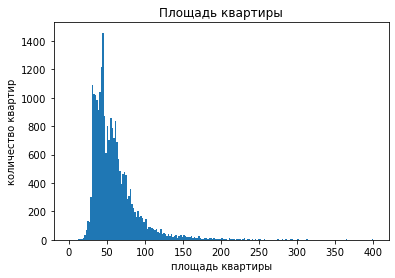

In [23]:
plt.hist(data['total_area'], bins = 200, range = (0, 400))
plt.title('Площадь квартиры')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

Можно заметить, что в основном все значения находятся в диапазоне от 15 до 300, встречаются лишь единичные случаи после 300, можно наблюдать пик около 45 кв.метров

#### Цена квартиры

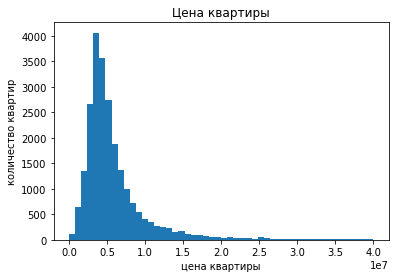

In [24]:
plt.hist(data['last_price'], bins = 50, range = (0, 40000000))
plt.title('Цена квартиры')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

Можно наблюдать пик около 4*10^6

#### Число комнат

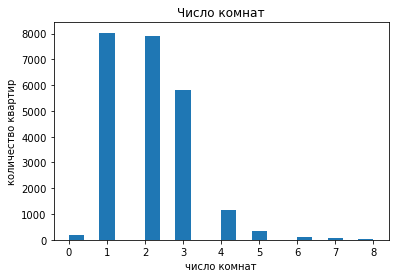

In [25]:
plt.hist(data['rooms'], bins = 20, range = (0, 8))
plt.title('Число комнат')
plt.xlabel('число комнат')
plt.ylabel('количество квартир')
plt.show()

Можно видеть пик на 1 и 2 комнатах и единичные значения после 8 комнат

#### Высота потолков

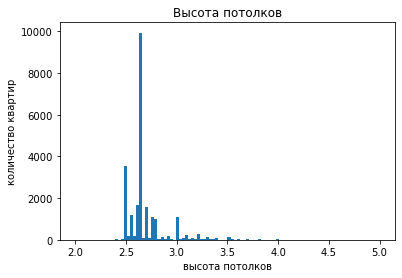

In [26]:
plt.hist(data['ceiling_height'], bins = 100, range = (2, 5)) 
plt.title('Высота потолков')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

Можем наблюдать пик около 2.6 метров, а все остальные значения находятся в основном в промежутке от 2 до 4, меньше 2 и больше 4 встречаются лишь единичные случаи

#### Вывод
В данном пункте были изучены площадь, цена, число комнат, высота потолков в квартирах. Во всех графиках можно заметить, что есть пики, а также сильно выбивающиеся значения, от которых следует избавиться. По графикам были определены значения, которые встречаются чаще всего: пик в площадях квартир прихожится на 45 кв.м; больше всего квартир с 1 или 2 комнатами; средняя цена около 4000000; а чаще всего встречающаяся высота потолков - 2.6 метра

### Время продажи квартиры

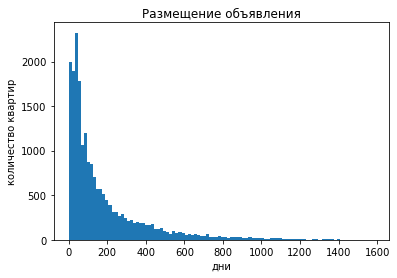

Среднее количество дней размещения объявления равно: 180.7531998045921
Медианное количество дней размещения объявления равна: 95.0


In [27]:
plt.hist(data['days_exposition'], bins = 100)
plt.title('Размещение объявления')
plt.xlabel('дни')
plt.ylabel('количество квартир')
plt.show()
 
print('Среднее количество дней размещения объявления равно:', data['days_exposition'].mean())
print('Медианное количество дней размещения объявления равна:', data['days_exposition'].median())

<b>Вывод:</b> можно заметить, что среднее и медиана отличаются почти в 2 раза, их этого можно сделать вывод, что есть сильно выбивающиеся в большую сторону значения
1 и 2 дня считаются необычайно быстрой продажей, так как почти не встречается таких значение, необычайно долгими можно считать продажи, длящиеся больше 1000 дней

### Убераем редкие и выбивающиеся значения

Уберем выбивающиеся значения из столбцов total_area, last_price, rooms, ceiling_height и days_exposition

В столбце total_area можно заметить выбивающиеся значения после 150

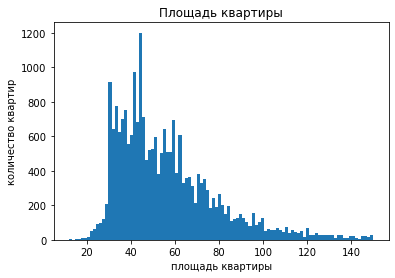

In [28]:
data = data.query('total_area <= 150.0')
plt.hist(data['total_area'], bins = 100)
plt.title('Площадь квартиры')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

В столбце last_price можно заметить выбивающиеся значения после 2*10^7 и до 450000

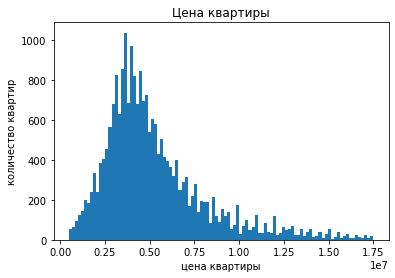

In [29]:
data = data.query('480000 <=last_price <= 17500000')
plt.hist(data['last_price'], bins = 100)
plt.title('Цена квартиры')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

В столбце rooms можно заметить выбивающиеся значения после 6

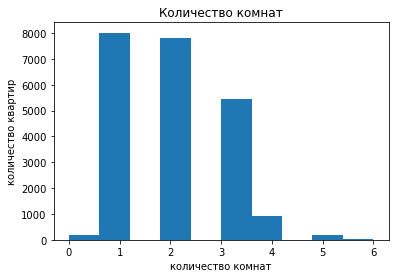

In [30]:
data = data.query('rooms <= 6')
plt.hist(data['rooms'], bins = 10)
plt.title('Количество комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

В столбце ceiling_height можно заметить выбивающиеся значения до 2.3 и после 3.6

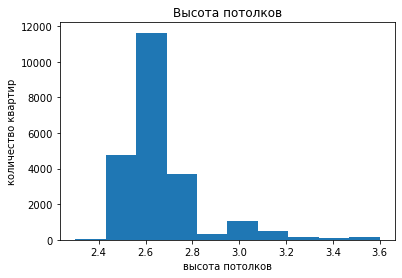

In [31]:
data = data.query('2.3 <= ceiling_height <= 3.6')
plt.hist(data['ceiling_height'], bins = 10)
plt.title('Высота потолков')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

### Какие факторы больше всего влияют на стоимость квартиры?

#### Зависимость цены от площади

Корреляция между ценой и площадью равна: 0.7550541499196144


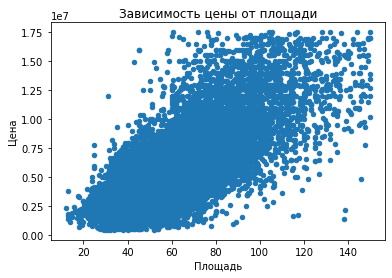

In [32]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', title = 'Зависимость цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
print('Корреляция между ценой и площадью равна:', data['total_area'].corr(data['last_price']))

С увеличением площади, происходит и увеличение цены, но можно найти и отдельные случаи с большой площадью и низкой ценой. Найдя корреляцию, можно сказать, что 0.76 показывает достаточно хорошую взаимосвязь данных факторов

#### Зависимость цены от числа комнат

Корреляция между ценой и числом комнат равна: 0.9878399218188516


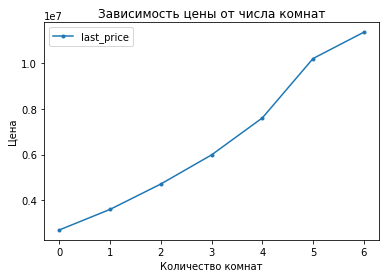

In [33]:
rooms__last_price = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').reset_index()
rooms__last_price.plot(x = 'rooms', y = 'last_price', title = 'Зависимость цены от числа комнат', marker = '.')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
print('Корреляция между ценой и числом комнат равна:', rooms__last_price['rooms'].corr(rooms__last_price['last_price'])) 

И по графику и по корреляции можно заметить, что цена сильно зависит от числа комнат.

#### Зависимость цены от удаленности от центра

Корреляция между ценой и удаленностью от центра равна: -0.3518791577745023


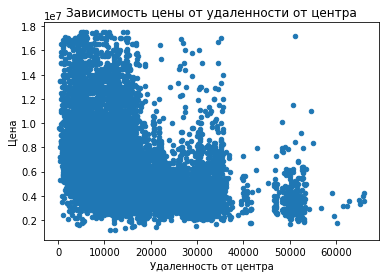

In [34]:
data.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', title = 'Зависимость цены от удаленности от центра') 
plt.xlabel('Удаленность от центра')
plt.ylabel('Цена')
print('Корреляция между ценой и удаленностью от центра равна:', data['cityCenters_nearest'].corr(data['last_price'])) 

По графику можно заметить, что 0 до 15000 метров от центра стоят примерно одинаково, далее цены начинают падать. Хоть корреляция не очень сильная, но по графику видно, что зависимость между факторами есть, если считать, что 15км тоже является центром

#### Зависимость цены от того, на каком этаже расположена квартира

Для этого создадим отдельный столбец, где 0-первый этаж, 1 - другой, 2 - последний

Корреляция между ценой и этажом равна: 0.3479601028621766


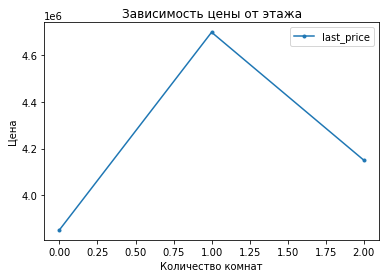

In [35]:
def to_one_floor_in_int(floor):
    if floor == 'первый':
        return 0
    elif floor == 'другой':
        return 1
    elif floor == 'последний':
        return 2

data['floor_in_int'] = data['floor_'].apply(to_one_floor_in_int)
floor__last_price = data.pivot_table(index = 'floor_in_int', values = 'last_price', aggfunc = 'median').reset_index()
floor__last_price.plot(x = 'floor_in_int', y = 'last_price', title = 'Зависимость цены от этажа', marker = '.')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
print('Корреляция между ценой и этажом равна:', floor__last_price['floor_in_int'].corr(floor__last_price['last_price']))

Корреляция между данными факторами также достаточно сильная. По графику можно заметить, что цена ниже всего на первом этаже.

#### Зависимость от даты размещения: дня недели, месяца и года

Корреляция между ценой и днем недели размещения объявления равна: -0.4991209646600509


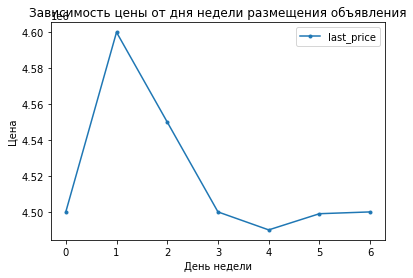

In [36]:
weekday__last_price = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median').reset_index()
weekday__last_price.plot(x = 'weekday', y = 'last_price', title = 'Зависимость цены от дня недели размещения объявления', marker = '.')
plt.xlabel('День недели')
plt.ylabel('Цена')
print('Корреляция между ценой и днем недели размещения объявления равна:', weekday__last_price['weekday'].corr(weekday__last_price['last_price']))

По графику можно заметить, что квартиры продаются дороже всего во вторник.

Корреляция между ценой и месяцем размещения объявления равна: 0.078890816068857


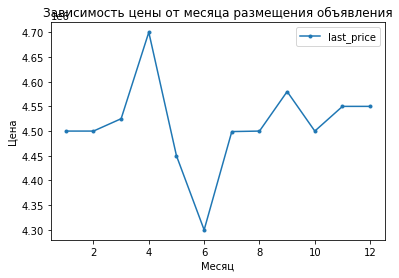

In [37]:
month__last_price = data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').reset_index()
month__last_price.plot(x = 'month', y = 'last_price', title = 'Зависимость цены от месяца размещения объявления', marker = '.')
plt.xlabel('Месяц')
plt.ylabel('Цена')
print('Корреляция между ценой и месяцем размещения объявления равна:', month__last_price['month'].corr(month__last_price['last_price']))

По графику можно заметить, что квартиры продаются примерно по одинаковой цене все месяцы. За исключением апреля (4), где квартиры дороже и июня (6), где квартиры дешевле.

Корреляция между ценой и годом размещения объявления равна: -0.6096751823281423


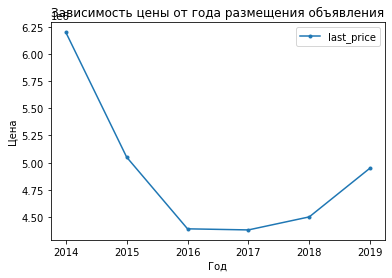

In [38]:
year__last_price = data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').reset_index()
year__last_price.plot(x = 'year', y = 'last_price', title = 'Зависимость цены от года размещения объявления', marker = '.')
plt.xlabel('Год')
plt.ylabel('Цена')
print('Корреляция между ценой и годом размещения объявления равна:', year__last_price['year'].corr(year__last_price['last_price']))

Можно заметить, что квартиры были дороже всего в 2014 году, далее цена начала снижаться, а с 2017 года опять постепенно повышаться.

<b>Вывод:</b> исходя из графиков и подсчитанной корреляции можно сказать, что больше всего на стоимость квартиры влияет ее площадь. Также влияет число комнат. Чуть меньше влияет удаленность от центра. День, месяц и год размещения не влияют на стоиомсть квартиры, так как корреляция в данных случаях прибллиженна к 0.

### 10 населённых пунктов с наибольшим числом объявлений

In [39]:
locality_data = data.pivot_table(index = 'locality_name', values = 'price_per_square_metre', aggfunc = ['count', 'mean']).reset_index()
locality_data.columns = ['name', 'count', 'mean']
top_10_localities = locality_data.sort_values(by = 'count', ascending = False).head(10)

print(top_10_localities)
print()
print('Наименьшая стоимость квадратного метра в {}({:.2f})'.format(str(top_10_localities[top_10_localities['mean'] == top_10_localities['mean'].min()]['name'].values[0]), top_10_localities['mean'].min()))
print('Наибольшая стоимость квадратного метра в {}({:.2f})'.format(str(top_10_localities[top_10_localities['mean'] == top_10_localities['mean'].max()]['name'].values[0]), top_10_localities['mean'].max()))

                  name  count           mean
33     Санкт-Петербург  14586  108076.984227
288     посёлок Мурино    520   85725.241381
323     посёлок Шушары    439   78655.103087
3           Всеволожск    393   67211.129215
32              Пушкин    353  101890.841179
13             Колпино    337   75333.295801
293  посёлок Парголово    326   90332.263023
6              Гатчина    305   68811.372828
92     деревня Кудрово    299   92473.547576
4               Выборг    229   58121.987388

Наименьшая стоимость квадратного метра в Выборг(58121.99)
Наибольшая стоимость квадратного метра в Санкт-Петербург(108076.98)


<b>Вывод:</b> В Санкт-Петербурге больше всего объявлений. Также там и самая большая стоимость за квадратный метр. Наименьшая стоимость за квадратный метр из данных населенных пунктов во Всеволожске.

### Какая область входит в центр?

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='center_in_km', ylabel='last_price'>

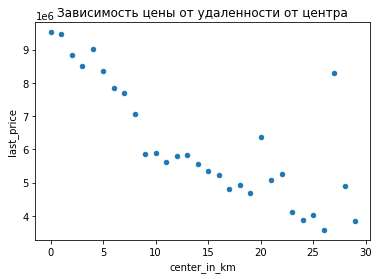

In [40]:
apartments_in_SPB = data.query('locality_name == "Санкт-Петербург"')
apartments_in_SPB['center_in_km'] = apartments_in_SPB['cityCenters_nearest'] // 1000
apartments_in_SPB['center_in_km'] = apartments_in_SPB['center_in_km'].astype('Int64')
km_price = apartments_in_SPB.pivot_table(index = 'center_in_km', values = 'last_price').reset_index()
km_price.plot(x = 'center_in_km', y = 'last_price', kind = 'scatter', title = 'Зависимость цены от удаленности от центра')

<b>Вывод:</b> По графику определили, что в центральную зону входят квартиры с удаленность до 3 км.

### Сегмент квартир в центре

#### Изучение следующих параметров: площадь, цена, число комнат, высота

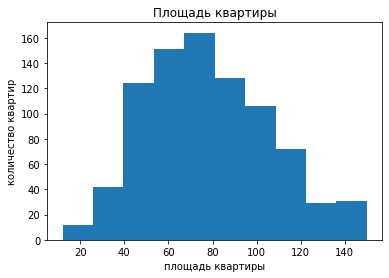

In [41]:
apartments_in_centre = apartments_in_SPB[apartments_in_SPB['center_in_km'] <= 3]

plt.hist(apartments_in_centre['total_area'])
plt.title('Площадь квартиры')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

Средняя площадь квартир находится в диапазоне от 50 до 80 кв.м

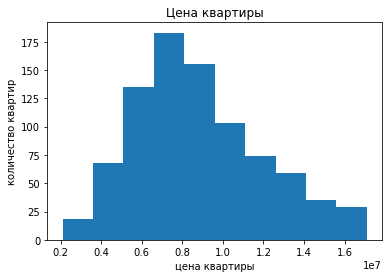

In [42]:
plt.hist(apartments_in_centre['last_price'])
plt.title('Цена квартиры')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

Пик цен квартир находится на цене в 7000000, пик на 3000000 превышает пик по всем квартирам, квартиры в Санкт-Петербурге самые дорогие

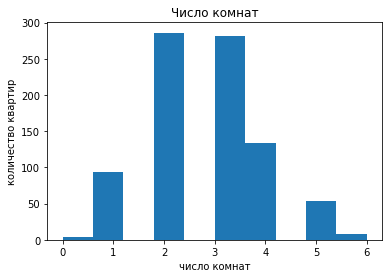

In [43]:
plt.hist(apartments_in_centre['rooms'])
plt.title('Число комнат')
plt.xlabel('число комнат')
plt.ylabel('количество квартир')
plt.show()

Чаще всего встречается 2 и 3 комнаты

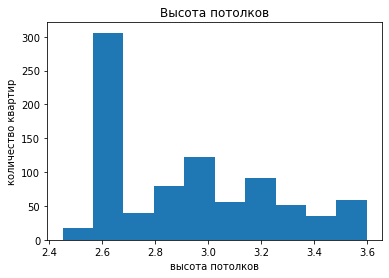

In [44]:
plt.hist(apartments_in_centre['ceiling_height'])
plt.title('Высота потолков')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

Пик в графике приходится на 2.6 метра, в данном случае пик превышает на 0.1 метра пик по всем квартирам

<b>Вывод:</b> в сегменте квартир, находящихся в центре Санкт-Петербурга, есть отличия от всех квартир. Например средняя цена превышает на 3000000 среднюю цену по всем квартирам. Площадь квартир находится в диапазоне от 50 до 80 кв.м. Здесь чаще встречаются 2-x и 3-комнатные квартиры, нежели 1-комнатные

#### Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

##### Зависимость цены от числа комнат

Корреляция между ценой и числом комнат равна: 0.9893116992342835


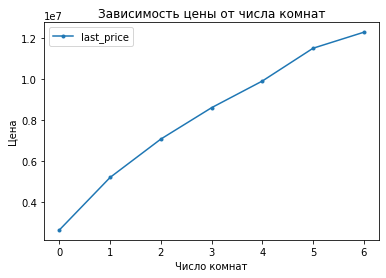

In [45]:
rooms___last_price = apartments_in_centre.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').reset_index()
rooms___last_price.plot(x = 'rooms', y = 'last_price', title = 'Зависимость цены от числа комнат', marker = '.')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
print('Корреляция между ценой и числом комнат равна:', rooms___last_price['rooms'].corr(rooms___last_price['last_price'])) 

Также, как и в случае со всеми квартирами, зависимость между этими факторами очень сильная.

##### Зависимость цены от удаленности от центра

Корреляция между ценой и удаленностью от центра равна: -0.1278843226621596


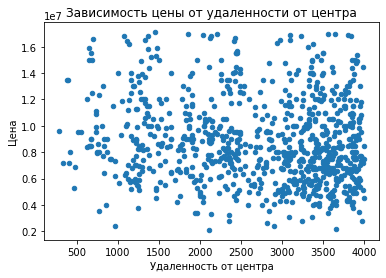

In [46]:
apartments_in_centre.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', title = 'Зависимость цены от удаленности от центра')
plt.xlabel('Удаленность от центра')
plt.ylabel('Цена')
print('Корреляция между ценой и удаленностью от центра равна:', apartments_in_centre['cityCenters_nearest'].corr(apartments_in_centre['last_price']))

##### Зависимость цены от этажа квартиры

Корреляция между ценой и этажом равна: 0.8369085266745758


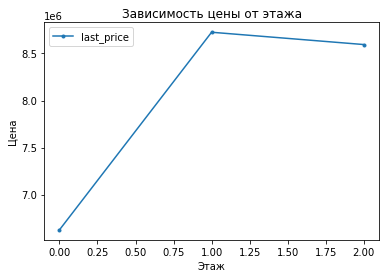

In [47]:
floor___last_price = apartments_in_centre.pivot_table(index = 'floor_in_int', values = 'last_price', aggfunc = 'median').reset_index()
floor___last_price.plot(x = 'floor_in_int', y = 'last_price', title = 'Зависимость цены от этажа', marker = '.')
plt.xlabel('Этаж')
plt.ylabel('Цена')
print('Корреляция между ценой и этажом равна:', floor___last_price['floor_in_int'].corr(floor___last_price['last_price']))

In [48]:
print('Медиана для первого этажа равна:', apartments_in_centre[apartments_in_centre['floor_'] == 'первый']['last_price'].median())
print('Медиана для другого этажа равна:', apartments_in_centre[apartments_in_centre['floor_'] == 'другой']['last_price'].median())
print('Медиана для последнего этажа равна:', apartments_in_centre[apartments_in_centre['floor_'] == 'последний']['last_price'].median())

Медиана для первого этажа равна: 6625000.0
Медиана для другого этажа равна: 8725246.0
Медиана для последнего этажа равна: 8594500.0


##### Зависимость от даты размещения: дня недели, месяца и года

Корреляция между ценой и днем недели размещения объявления равна: -0.1134458906185331


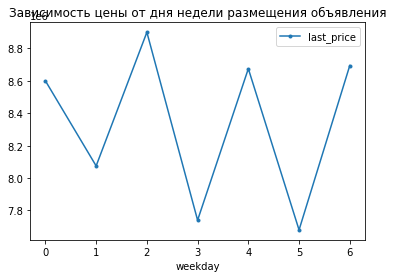

In [49]:
weekday___last_price = apartments_in_centre.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median').reset_index()
weekday___last_price.plot(x = 'weekday', y = 'last_price', title = 'Зависимость цены от дня недели размещения объявления', marker = '.')
print('Корреляция между ценой и днем недели размещения объявления равна:', weekday___last_price['weekday'].corr(weekday___last_price['last_price']))

Здесь уже есть различие в графике по всем квартирам. В данном случае получается, что квартиры дороже в среду, пятницу и воскресенье.

Корреляция между ценой и месяцем размещения объявления равна: -0.46944584776772225


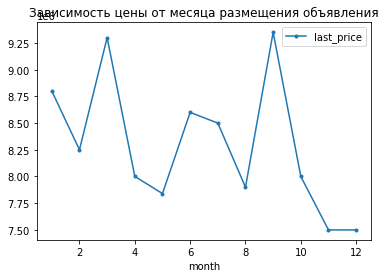

In [50]:
month___last_price = apartments_in_centre.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').reset_index()
month___last_price.plot(x = 'month', y = 'last_price', title = 'Зависимость цены от месяца размещения объявления', marker = '.')
print('Корреляция между ценой и месяцем размещения объявления равна:', month___last_price['month'].corr(month___last_price['last_price']))

Здесь тоже ситуация отличается. Можем наблюдать 2 пика: в марте (3) и в сентябре (9)

Корреляция между ценой и годом размещения объявления равна: -0.36177656111500717


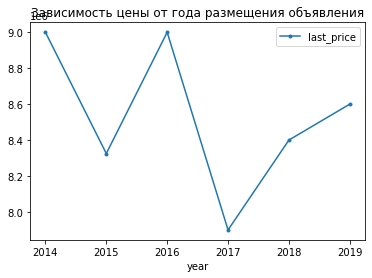

In [51]:
year___last_price = apartments_in_centre.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').reset_index()
year___last_price.plot(x = 'year', y = 'last_price', title = 'Зависимость цены от года размещения объявления', marker = '.')
print('Корреляция между ценой и годом размещения объявления равна:', year___last_price['year'].corr(year___last_price['last_price']))

Здесь тоже ситуация сильно отличается от ситуации по всем квартирам. Если в 2016 году был спад цен по всем квартирам, то квартиры в центре СПБ наоборот стоили дороже. Но в 2017 году произошел спад цен, также как и в ситуации со всеми квартирами.

<b>Вывод:</b> по сути здесь влияют те же факторы, что и при рассмотрении всех квартир: число комнат, чуть меньше влияет удаленность от центра, также не влияют день, месяц и год размещения объявления.

## Общий вывод

Исходные даннные были подготовлены, то есть очищены от пропусков и приведены к нужному типу. Были определены средняя площадь, цена, высота потолков. Также было определено, что площадь квартиры, число комнат и удаленность от центра больше всего влияют на стоимость квартиры. Был рассмотрен срез по центральным квартирам в Санкт-Петербурге. Площадь квартир в центре находится в диапазоне от 50 до 80 кв.м., в то время как пик по всем квартирам приходится на 45 кв.м.. Цена квартир в центре превышает на 3 млн рублей цены по всем квартирам. В центре города больше квартир с 2 и 3 комнатами, в то время как в области больше квартир с 1 либо с 2 комнатами. Высота потолков в Санкт-Петербурге выше на 0.1 метр. 